In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### warmUpExercise

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### Linear regression with one variable

#### Plotting the data

In [4]:
data = pd.read_csv('data/ex1data1.txt', header=None, names=['x','y'])

In [5]:
x = data['x']
y = data['y']
m = len(y)

(-5, 25)

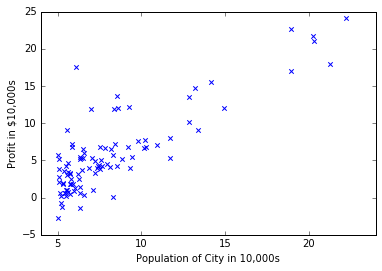

In [6]:
plt.scatter(x,y, marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4,24)
plt.ylim(-5,25)

#### Gradient Descent

In [7]:
#add a column of ones to x
X = pd.concat([pd.Series(np.ones(m)), x], axis=1)
X.columns=['1','x']
#initialize fitting parameters
#theta = pd.Series(np.zeros(2))
#iterations = 1500
#alpha=0.01

In [8]:
def computeCost(X, y, theta = pd.Series(np.zeros(2))):
    m = len(y)
    J = 0
    
    h = np.dot(X, theta)
    J = 1/2/m*np.sum((h-y)**2)
    
    return(J)

In [9]:
print(computeCost(X, y, pd.Series(np.zeros(2))))

32.072733877455654


In [10]:
def gradientDescent(X, y, theta = (pd.Series(np.zeros(2))), alpha = 0.01, num_iters = 1500):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - alpha/m*(np.dot(X.T,h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


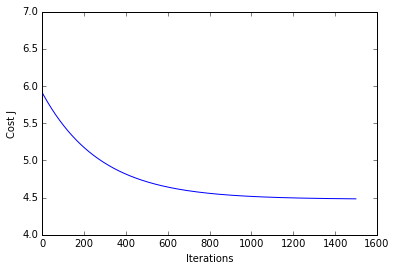

In [11]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost J')

#### Predict

In [12]:
print(np.dot([1,3.5], theta))
print(np.dot([1,7], theta))

0.45197678677
4.53424501294


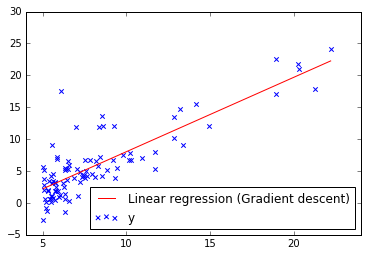

In [13]:
xx = np.array([min(x), max(x)])
yy = theta[0]+ theta[1]*xx

plt.scatter(x,y, marker='x')
plt.plot(xx, yy ,c='r', label = 'Linear regression (Gradient descent)')
plt.xlim(4,24)
plt.legend(loc='lower right')

In [14]:
#predict the profit
print(np.dot(theta, [1, 3.5])*10000)
print(np.dot(theta, [1, 7])*10000)

4519.7678677
45342.4501294


#### Visualizing

In [15]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100);

#create meshgrid
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals, indexing='ij')

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for (i,j),v in np.ndenumerate(J_vals):
    J_vals[i,j] = computeCost(X, y, (theta0[i,j], theta1[i,j]))



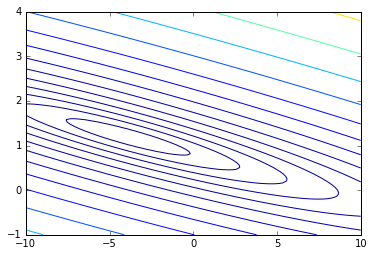

In [16]:
#contour plot
plt.contour(theta0, theta1, J_vals, np.logspace(-2, 3, 30))

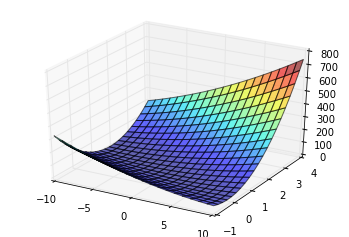

In [17]:
#surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0, theta1, J_vals, rstride=5, cstride=5, alpha=0.6, cmap=plt.cm.jet)
